In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex2data2.txt',names = ['Test1','Test2','Accepted'])
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


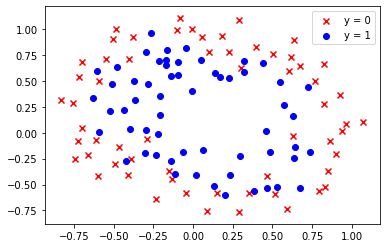

In [5]:
fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']== 0]['Test1'],data[data['Accepted']== 0]['Test2'],c= 'r',marker = 'x',label = 'y = 0')
ax.scatter(data[data['Accepted']== 1]['Test1'],data[data['Accepted']== 1]['Test2'],c= 'b',marker = 'o',label = 'y = 1')
ax.legend()
plt.show()

In [7]:
def feature_mapping(x1,x2,power):
    data = {}
    for i in np.arange(power + 1):
        for j in np.arange(i + 1):
            data['F{}{}'.format(i - j,j)] = np.power(x1,i-j)*np.power(x2,j)
    return pd.DataFrame(data)
x1 = data['Test1']
x2 = data['Test2']
data2 = feature_mapping(x1,x2,6)
data2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [23]:
X = data2.values
X = np.array(X)
y = data.iloc[:,-1]
y = np.array(y)
y.shape

(118,)

In [24]:
X.shape

(118, 28)

In [25]:
y = y.reshape(118,1)

In [26]:
m = len(X)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def costFunction(X,y,theta,lamda):
    h = sigmoid(X@theta)
    first = y * np.log(h)
    second = (1 - y) * np.log(1 - h)
    reg = lamda* np.sum(np.power(theta[1:],2))/(2 * m)
    return - np.sum(first+second)/m + reg
theta = np.zeros((28,1))
lamda = 1
cost_init = costFunction(X,y,theta,lamda)
cost_init

0.6931471805599454

In [40]:
def gradientDescent(X,y,theta,alpha,iters,lamda):
    for i in range(iters):
        h = sigmoid(X@theta)
        h = np.array(h)
        reg = (lamda / m)*theta[1:]
        reg = np.insert(reg,0,values = 0,axis = 0)
        theta = theta - (X.T@(h - y))*(alpha / m) - reg*alpha
    return theta
alpha = 0.001
iters = 200000
lamda = 0.01
theta_final = gradientDescent(X,y,theta,alpha,iters,lamda)
print(theta_final)

[[ 1.86497342]
 [ 1.17567585]
 [ 2.00900624]
 [-3.08768313]
 [-1.67559085]
 [-2.12024252]
 [ 0.31884146]
 [-0.66902696]
 [-0.62875845]
 [-0.23854083]
 [-2.35826509]
 [-0.13862793]
 [-1.01546402]
 [-0.53198485]
 [-1.92758493]
 [-0.35490373]
 [-0.3839797 ]
 [-0.07550751]
 [-0.48327898]
 [-0.54225701]
 [-0.75282651]
 [-1.73358339]
 [ 0.01569133]
 [-0.48926959]
 [ 0.00563805]
 [-0.55334456]
 [-0.29494057]
 [-1.55351834]]


绘制等高线

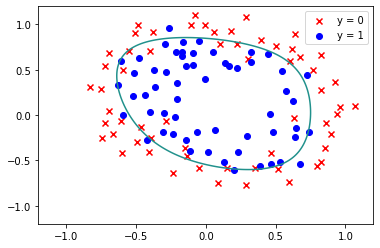

In [41]:

x = np.linspace(-1.2,1.2,200)
xx,yy = np.meshgrid(x,x)
z = feature_mapping(xx.ravel(),yy.ravel(),6).values

zz = z@theta_final
zz = zz.reshape(xx.shape)
fig,ax = plt.subplots()

ax.scatter(data[data['Accepted']== 0]['Test1'],data[data['Accepted']== 0]['Test2'],c= 'r',marker = 'x',label = 'y = 0')
ax.scatter(data[data['Accepted']== 1]['Test1'],data[data['Accepted']== 1]['Test2'],c= 'b',marker = 'o',label = 'y = 1')

ax.legend()
ax.contour(xx,yy,zz,0)
plt.show()

预测准确率

In [39]:
def predict(X,theta):
    prob = sigmoid(X@theta)
    return [1 if x>= 0.5 else 0 for x in prob]

y_= np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)
acc = np.mean(y_pre == y)
print(acc)

0.8135593220338984
